In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-09-23 13:15:20.461479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-23 13:15:21.167718: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-23 13:15:21.172060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 13:15:23.601002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# directly reading the dataset from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

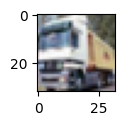

In [6]:
plt.figure(figsize=(1,2))
plt.imshow(X_train[1])

In [7]:
classes = ['airpplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
y_train[1]

array([9], dtype=uint8)

In [9]:
# y_train is an array, so we need to pass the first element of the array
classes[y_train[1][0]]

'truck'

In [10]:
X_train_scaled = X_train / 255

In [11]:
# lets do one hot encoding
# num_classes = 10 as there are ten output classes
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'    
)
y_train_categorical


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), # flatten the input from two dinsion (32,32,3) into one dimension (3072)
    keras.layers.Dense(3000, activation = 'relu'), #introduce a hidden layer and in hidden layer activation function 'relu' is preferred
                                                    # let the number 3000 be less than the dimensions 3072 
    keras.layers.Dense(1000, activation = 'relu'), # one more hidden layer increases the classification better
    keras.layers.Dense(10, activation = 'sigmoid') # output layer with 10 outputs and in this layer, 
                                                   # activation function 'sigmoid' is used though others can be used
])

model.compile(optimizer = 'SGD', #SGD - Stocastic Gradient
              loss = 'categorical_crossentropy', # since the data is one hot encoded, we are using this loss, 
              #if it is discreet we will use 'sparse_categorical_crossentropy
              metrics = ['accuracy']  
)

In [14]:
model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8164 - accuracy: 0.3525
Epoch 2/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.6256 - accuracy: 0.4279
Epoch 3/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5439 - accuracy: 0.4570
Epoch 4/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4829 - accuracy: 0.4782
Epoch 5/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4342 - accuracy: 0.4947
Epoch 6/50
1563/1563 [==============================] - 90s 57ms/step - loss: 1.3904 - accuracy: 0.5117
Epoch 7/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3529 - accuracy: 0.5248
Epoch 8/50
1563/1563 [==============================] - 90s 58ms/step - loss: 1.3182 - accuracy: 0.5369
Epoch 9/50
1563/1563 [==============================] - 90s 57ms/step - loss: 1.2849 - accuracy: 0.5475
Epoch 10/50
1563/1563 [==============================] - 90s 58m

In [20]:
# the below sentences describe how the last sentence is built up
# predict the target using the test data - this returns predictions for all the data in array format
#model.predict(X_test_scaled)
# lets predict for a single value that is '0'
#model.predict(X_test_scaled)[0]
# since the above prediction returns 10 output prediction values (probability), we need to take the maximum of the prediction
#np.argmax(model.predict(X_test_scaled)[0])
# lets inout the maximum into the claases array as its index to display the category
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 3s 10ms/step


'cat'